In [2]:
import matplotlib.pyplot as plt
import re 
import ast


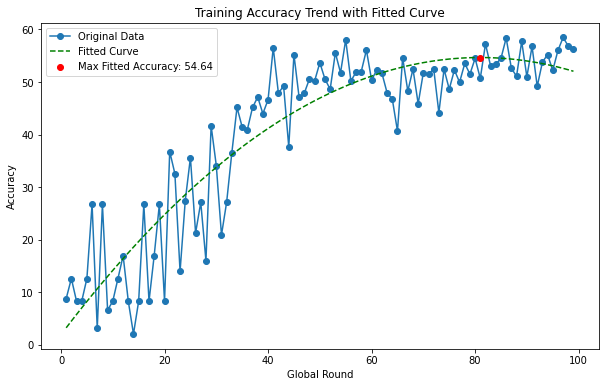

In [134]:
import numpy as np
import ast
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Read the data from the file
file_path = "/home/shiyue/FLsim/results/accuracy_trend.txt"
accuracy_values = []

with open(file_path, "r") as file:
    lines = file.readlines()

for line in lines:
    data = ast.literal_eval(line)
    accuracy = data['Accuracy']
    accuracy_values.append(accuracy)

# Convert epochs to a numpy array
epochs = range(1, len(accuracy_values) + 1)
epochs_arr = np.array(epochs)

# Define a function for polynomial fitting
def polynomial(x, a, b, c):
    return a * x**2 + b * x + c

# Perform curve fitting
popt, _ = curve_fit(polynomial, epochs_arr, accuracy_values)

# Generate y values for the fitted curve
fitted_curve = polynomial(epochs_arr, *popt)

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the original data and the fitted curve
plt.plot(epochs, accuracy_values, marker='o', linestyle='-', label='Original Data')
plt.plot(epochs, fitted_curve, color='green', linestyle='--', label='Fitted Curve')

# Find the maximum point of the fitted curve
max_index = np.argmax(fitted_curve)
max_accuracy_fitted = fitted_curve[max_index]
max_global_round_fitted = epochs[max_index]

# Mark the maximum point of the fitted curve
plt.scatter(max_global_round_fitted, max_accuracy_fitted, color='red', label=f'Max Fitted Accuracy: {max_accuracy_fitted:.2f}', zorder=5)

plt.xlabel("Global Round")
plt.ylabel("Accuracy")
plt.title("Training Accuracy Trend with Fitted Curve")
plt.legend()
plt.show()

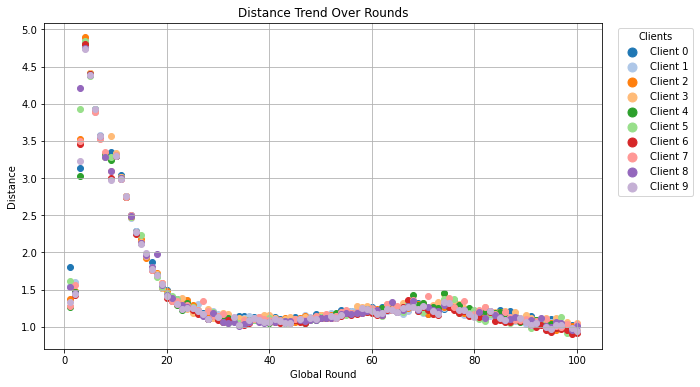

In [144]:
################################################################################
#######################plot the distance for each clients
################################################################################
import matplotlib.pyplot as plt
import numpy as np

# Read data from the file
file_path = "/home/shiyue/FLsim/results/distance_values.txt"
with open(file_path, "r") as file:
    data = file.readlines()

# Parse the data and extract round numbers, client IDs, and distances
rounds = []
clients = []
distances = []
for line in data:
    parts = line.strip().split(", ")
    round_number = int(parts[0].split(": ")[1])
    client_id = int(parts[1].split(": ")[1])
    distance = float(parts[2].split(": ")[1])
    rounds.append(round_number)
    clients.append(client_id)
    distances.append(distance)

max_client_num = (max(clients))

# Define a color map
cmap = plt.get_cmap('tab20')

# Plot the distances against rounds with different markers and colors for each client
plt.figure(figsize=(10, 6))
for client_id in range(max_client_num+1):  # Assuming you have 20 clients
    x = [rounds[i] for i in range(len(rounds)) if clients[i] == client_id]
    y = [distances[i] for i in range(len(distances)) if clients[i] == client_id]
    color = cmap(client_id % 20)  # Use modulus to ensure distinct colors for each client
    plt.scatter(x, y, label=f'Client {client_id}', marker='o', color=color)

# Create separate legends for two categories
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), title='Clients', markerscale=1.5)

plt.xlabel('Global Round')
plt.ylabel('Distance')
plt.title('Distance Trend Over Rounds')
plt.grid(True)
plt.show()

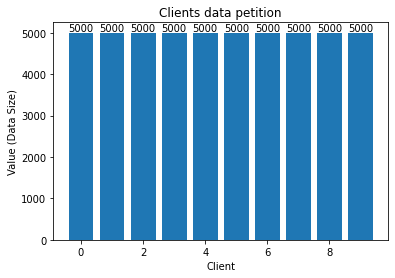

In [104]:
### plot the client data distribution
file_path = "/home/shiyue/FLsim/results/client_data_size.txt"

clients = []
data_sizes = []

with open (file_path, 'r') as file:
    lines = file.readlines()[:10]


for line in lines:
    parts = line.split(", ")
    client = int(parts[0].split(": ")[1])
    data_size = int(parts[1].split(": ")[1])
    clients.append(client)
    data_sizes.append(data_size)


plt.bar(clients,data_sizes)
plt.xlabel("Client")
plt.ylabel("Value (Data Size)")
plt.title("Clients data petition")

for i,value in enumerate(data_sizes):
    plt.text(clients[i],value,str(value),ha='center',va='bottom')

plt.show()





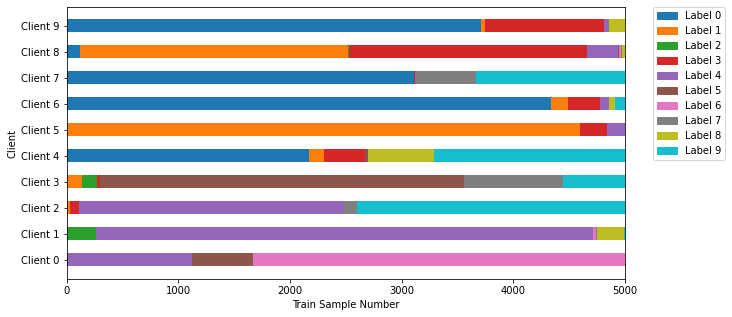

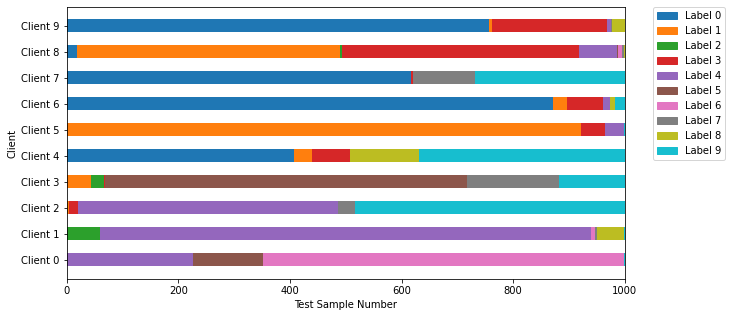

In [145]:
import matplotlib.pyplot as plt

file_path = "/home/shiyue/FLsim/results/non-iid_data_distribution.txt"

# Initialize dictionaries to store training and testing data for each client
train_data = {}
test_data = {}

# Read the file line by line
with open(file_path, 'r') as file:
    for line in file:
        # Split the line into words
        words = line.split()

        # Extract information from the line
        client_id = int(words[1][:-1])  # Extract the client ID
        data_type = words[2].lower()    # Extract whether it's training or testing data
        label = int(words[4][:-1])       # Extract the label
        samples = int(words[-1])        # Extract the number of samples

        # Update the corresponding dictionary
        if data_type == 'train':
            if client_id not in train_data:
                train_data[client_id] = {}
            train_data[client_id][label] = samples
        elif data_type == 'test':
            if client_id not in test_data:
                test_data[client_id] = {}
            test_data[client_id][label] = samples

# Combine training and testing data for plotting
data_to_plot_train = {**train_data}
data_to_plot_test = {**test_data}

# Plot for training data
fig, ax_train = plt.subplots(figsize=(10, 5))
legend_labels_train = set()  # Track unique labels for custom legend

for i, client in enumerate(data_to_plot_train):
    for j, label in enumerate(data_to_plot_train[client]):
        ax_train.barh(i, data_to_plot_train[client][label], left=sum([data_to_plot_train[client][l] for l in list(data_to_plot_train[client])[:j]]), height=0.5, color=f'C{j}')
        legend_labels_train.add(label)

ax_train.set_yticks(range(len(data_to_plot_train)))
ax_train.set_yticklabels([f'Client {c}' for c in data_to_plot_train.keys()])
ax_train.set_xlabel('Train Sample Number')
ax_train.set_ylabel('Client')

# Create a custom legend for training data
legend_handles_train = [plt.Rectangle((0, 0), 1, 1, color=f'C{j}', label=f'Label {label}') for j, label in enumerate(legend_labels_train)]
ax_train.legend(handles=legend_handles_train, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Plot for testing data
fig, ax_test = plt.subplots(figsize=(10, 5))
legend_labels_test = set()  # Track unique labels for custom legend

for i, client in enumerate(data_to_plot_test):
    for j, label in enumerate(data_to_plot_test[client]):
        ax_test.barh(i, data_to_plot_test[client][label], left=sum([data_to_plot_test[client][l] for l in list(data_to_plot_test[client])[:j]]), height=0.5, color=f'C{j}')
        legend_labels_test.add(label)

ax_test.set_yticks(range(len(data_to_plot_test)))
ax_test.set_yticklabels([f'Client {c}' for c in data_to_plot_test.keys()])
ax_test.set_xlabel('Test Sample Number')
ax_test.set_ylabel('Client')

# Create a custom legend for testing data
legend_handles_test = [plt.Rectangle((0, 0), 1, 1, color=f'C{j}', label=f'Label {label}') for j, label in enumerate(legend_labels_test)]
ax_test.legend(handles=legend_handles_test, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()


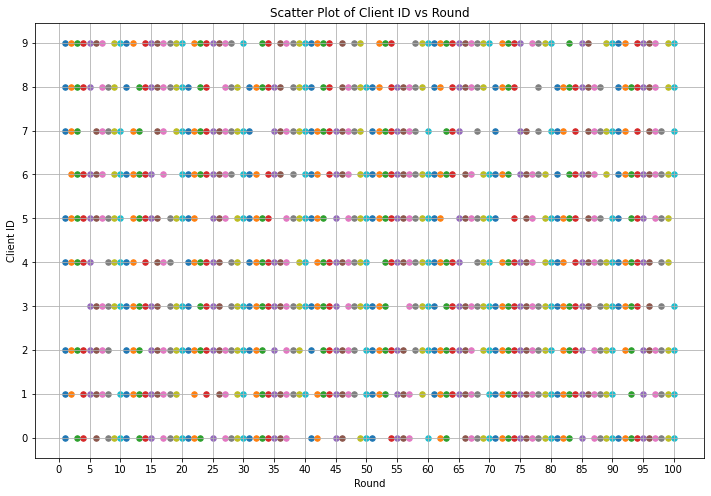

In [146]:
# show the client selection distribution

import matplotlib.pyplot as plt

# Read data from the file
file_path = "/home/shiyue/FLsim/results/client_selection_log.txt"
with open(file_path, 'r') as file:
    lines = file.readlines()

# Parse the data
data = [list(map(int, line.strip()[1:-1].split(','))) for line in lines]

# Create a scatter plot
plt.figure(figsize=(12, 8))

for round_num, client_ids in enumerate(data):
    plt.scatter([round_num + 1] * len(client_ids), client_ids, marker='o', s=30)

plt.xlabel('Round')
plt.ylabel('Client ID')
plt.title('Scatter Plot of Client ID vs Round')

# Set x-axis ticks starting from 0 with a step size of 5, including the maximum value
max_round = len(data)
plt.xticks(range(0, max_round + 1, 5), range(0, max_round + 1, 5))

# Set y-axis ticks starting from 0 with a step size of 1
plt.yticks(range(max(map(max, data)) + 1))

plt.grid(True)
plt.show()


In [127]:
# clear all data under results folder
files_to_clear = [
    "/home/shiyue/FLsim/results/accuracy_trend.txt",
    "/home/shiyue/FLsim/results/client_data_size.txt",
    "/home/shiyue/FLsim/results/client_selection_log.txt",
    "/home/shiyue/FLsim/results/distance_values.txt",
    "/home/shiyue/FLsim/results/eva_accuracy_per_round.txt",
    "/home/shiyue/FLsim/results/non-iid_data_distribution.txt"
]

for file_path in files_to_clear:
    with open(file_path, 'w') as file:
        file.truncate()
